In [189]:
import numpy as np 
import pandas as pd
import os
#from tabulate import tabulate
import time
import pickle
import textwrap

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'monospace'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

import joblib
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform, euclidean

from xgboost import XGBClassifier

from scipy.stats import boxcox

from IPython.display import display

RANDOM_STATE = 42

**DATA PREPARATION**

In [190]:
# List of diseases in a predefined order
category_order = [
    'Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
    'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
    'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
    'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
    'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
    'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
    'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
    'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
    'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
    'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo',
    'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo'
]

# Check the number of diseases in the list
len(category_order)

# Create a mapping from disease names to their corresponding index in the list
mapping = {disease: idx for idx, disease in enumerate(category_order)}

# Create a reverse mapping from index to disease names
inverse_mapping = {v: k for k, v in mapping.items()}

In [191]:
# Load the training dataset from the specified file path
train = pd.read_csv(r'D:\Download\MachineLearning\disease prediction\train.csv')

# Load the testing dataset from the specified file path
test = pd.read_csv(r'D:\Download\MachineLearning\disease prediction\Testing.csv')

# Print the shape (number of rows and columns) of the training dataset
print(train.shape)

# Print the shape (number of rows and columns) of the testing dataset
print(test.shape)

(4510, 133)
(410, 133)


In [192]:
# Drop columns that contain only NaN (missing) values in the training dataset
train = train.dropna(axis=1, how="all")

# Display the modified training dataset
train


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4505        0          0                     0                    0   
4506        0          1                     0                    0   
4507        0          0                     0                    0   
4508        0          1                     0                    0   
4509        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       1           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4505          0       0           0             0        0                 0   
4506          0       0           0             0        0                 0   
4507          0       0           0             0        0                 0   
4508          0       0           1             0        0                 0   
4509          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4505  ...           0         0             0                    0   
4506  ...           1         1             0                    0   
4507  ...           0         0             0                    0   
4508  ...           0         0             1                    1   
4509  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4505                     0                   0        0                     0   
4506                     0                   0        0                     0   
4507                     0                   0        0                     0   
4508                     1                   1        0                     0   
4509                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [193]:
#Check value null 
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [194]:
#Check value null 
test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [195]:
# Statistic of numerical fields
train.describe().astype('int')

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count     4510       4510                  4510                 4510   
mean         0          0                     0                    0   
std          0          0                     0                    0   
min          0          0                     0                    0   
25%          0          0                     0                    0   
50%          0          0                     0                    0   
75%          0          0                     0                    0   
max          1          1                     1                    1   

       shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
count       4510    4510        4510          4510     4510              4510   
mean           0       0           0             0        0                 0   
std            0       0           0             0        0                 0   
min            0       0           0             0        0                 0   
25%            0       0           0             0        0                 0   
50%            0       0           0             0        0                 0   
75%            0       0           0             0        0                 0   
max            1       1           1             1        1                 1   

       ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
count  ...                4510        4510      4510          4510   
mean   ...                   0           0         0             0   
std    ...                   0           0         0             0   
min    ...                   0           0         0             0   
25%    ...                   0           0         0             0   
50%    ...                   0           0         0             0   
75%    ...                   0           0         0             0   
max    ...                   1           1         1             1   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
count                 4510                  4510                4510     4510   
mean                     0                     0                   0        0   
std                      0                     0                   0        0   
min                      0                     0                   0        0   
25%                      0                     0                   0        0   
50%                      0                     0                   0        0   
75%                      0                     0                   0        0   
max                      1                     1                   1        1   

       red_sore_around_nose  yellow_crust_ooze  
count                  4510               4510  
mean                      0                  0  
std                       0                  0  
min                       0                  0  
25%                       0                  0  
50%                       0                  0  
75%                       0                  0  
max                       1                  1  

[8 rows x 132 columns]

In [196]:
test.describe()


itching   skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  410.000000  410.000000            410.000000           410.000000   
mean     0.129268    0.148780              0.019512             0.041463   
std      0.335907    0.356307              0.138486             0.199603   
min      0.000000    0.000000              0.000000             0.000000   
25%      0.000000    0.000000              0.000000             0.000000   
50%      0.000000    0.000000              0.000000             0.000000   
75%      0.000000    0.000000              0.000000             0.000000   
max      1.000000    1.000000              1.000000             1.000000   

        shivering      chills  joint_pain  stomach_pain     acidity  \
count  410.000000  410.000000  410.000000    410.000000  410.000000   
mean     0.019512    0.153659    0.131707      0.041463    0.041463   
std      0.138486    0.361062    0.338585      0.199603    0.199603   
min      0.000000    0.000000    0.000000      0.000000    0.000000   
25%      0.000000    0.000000    0.000000      0.000000    0.000000   
50%      0.000000    0.000000    0.000000      0.000000    0.000000   
75%      0.000000    0.000000    0.000000      0.000000    0.000000   
max      1.000000    1.000000    1.000000      1.000000    1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads    scurring  \
count        410.000000  ...          410.000000  410.000000  410.000000   
mean           0.019512  ...            0.019512    0.019512    0.019512   
std            0.138486  ...            0.138486    0.138486    0.138486   
min            0.000000  ...            0.000000    0.000000    0.000000   
25%            0.000000  ...            0.000000    0.000000    0.000000   
50%            0.000000  ...            0.000000    0.000000    0.000000   
75%            0.000000  ...            0.000000    0.000000    0.000000   
max            1.000000  ...            1.000000    1.000000    1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count    410.000000           410.000000            410.000000   
mean       0.021951             0.021951              0.021951   
std        0.146703             0.146703              0.146703   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails     blister  red_sore_around_nose  yellow_crust_ooze  
count          410.000000  410.000000            410.000000         410.000000  
mean             0.021951    0.021951              0.021951           0.021951  
std              0.146703    0.146703              0.146703           0.146703  
min              0.000000    0.000000              0.000000           0.000000  
25%              0.000000    0.000000              0.000000           0.000000  
50%              0.000000    0.000000              0.000000           0.000000  
75%              0.000000    0.000000              0.000000           0.000000  
max              1.000000    1.000000              1.000000           1.000000  

[8 rows x 132 columns]

In [197]:
# Statistic of categorical fields
train.describe(include='object')

prognosis
count               4510
unique                41
top     Fungal infection
freq                 110

In [198]:
test.describe(include='object')


prognosis
count                410
unique                41
top     Fungal infection
freq                  10

In [199]:
# Xác định các cột số và cột phân loại, loại trừ cột 'prognosis' khỏi danh sách cột phân loại
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col != 'prognosis']

# In danh sách cột số và cột phân loại
print(f'Numerical Columns: {numerical_cols}')
print(f'Categorical Columns: {categorical_cols}')

Numerical Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate

In [200]:
train.isna().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [201]:
test.isna().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

**EDA**

In [202]:
# Count the occurrences of each unique disease (prognosis) in the dataset
prognosisVC = train.prognosis.value_counts()

# Reorder the count values based on the predefined category_order list
# If a disease from category_order is missing in train.prognosis, its count will be NaN
prognosisVC = prognosisVC.reindex(category_order)

# Display the result
prognosisVC

prognosis
Fungal infection                           110
Allergy                                    110
GERD                                       110
Chronic cholestasis                        110
Drug Reaction                              110
Peptic ulcer diseae                        110
AIDS                                       110
Diabetes                                   110
Gastroenteritis                            110
Bronchial Asthma                           110
Hypertension                               110
Migraine                                   110
Cervical spondylosis                       110
Paralysis (brain hemorrhage)               110
Jaundice                                   110
Malaria                                    110
Chicken pox                                110
Dengue                                     110
Typhoid                                    110
hepatitis A                                110
Hepatitis B                                110
Hep

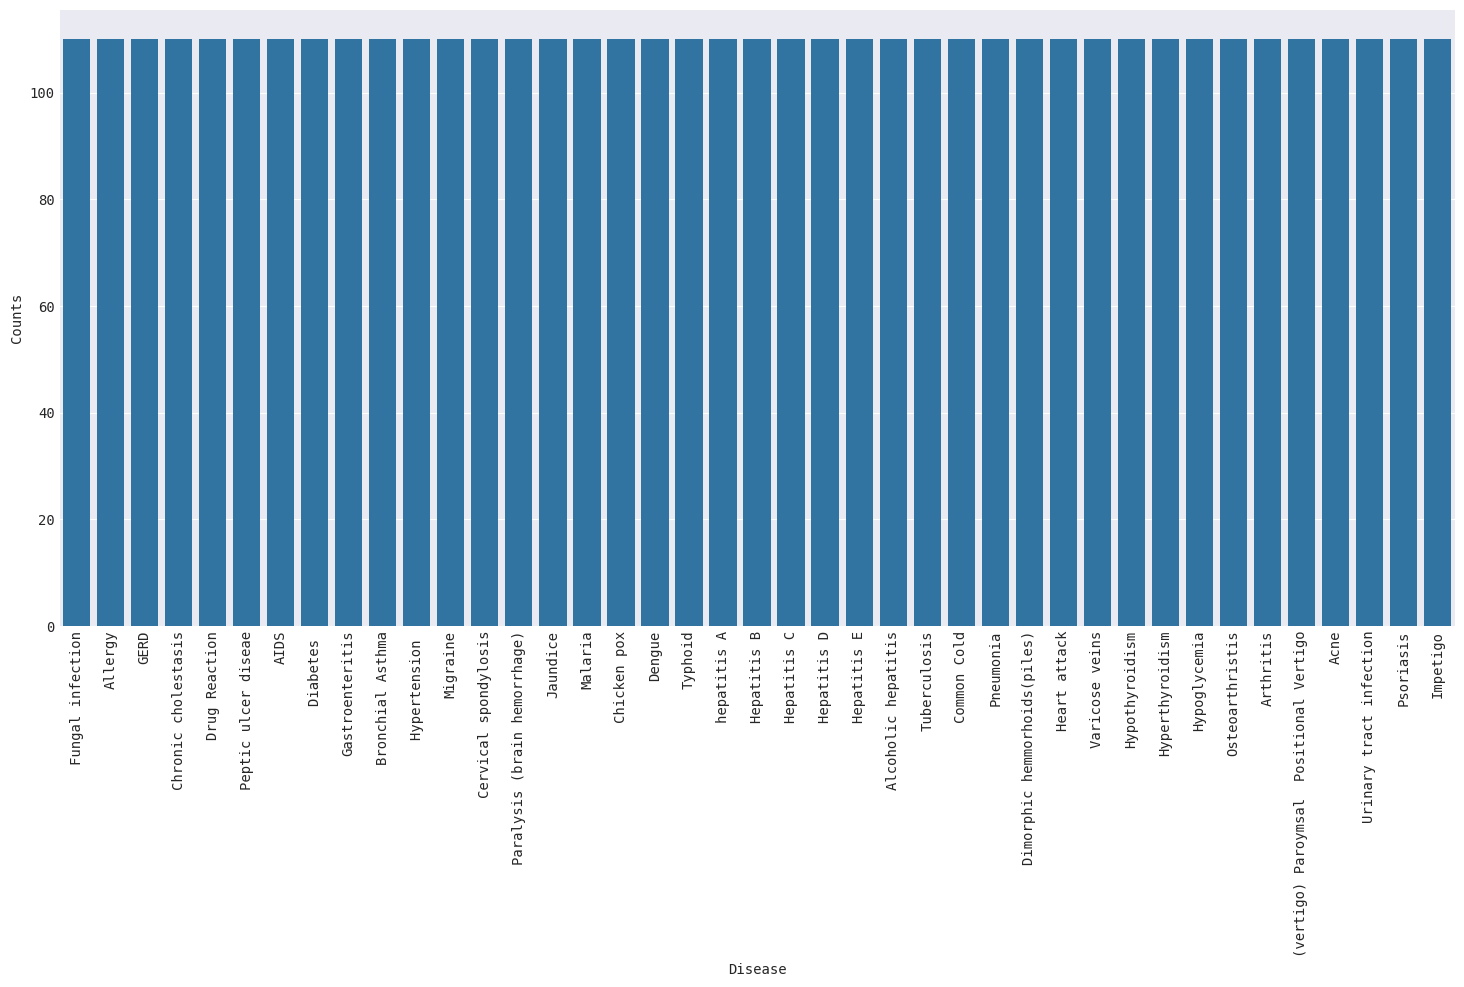

In [203]:

# checking whether the dataset is balanced or not
disease_counts = train['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})


plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y = 'Counts' , data=temp_df)
plt.xticks(rotation=90)
plt.show()

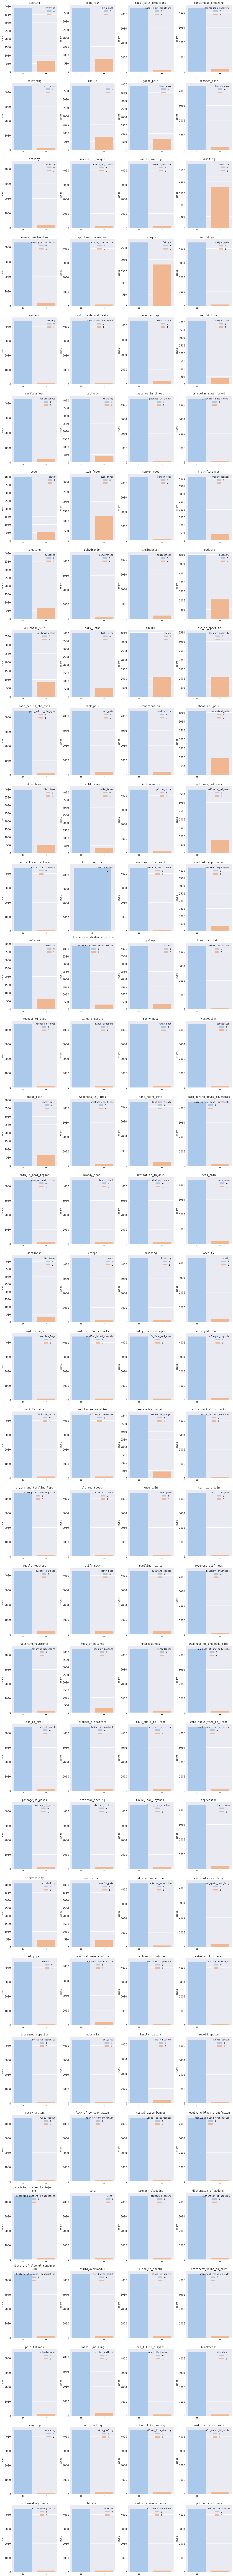

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import math

# Lấy danh sách tất cả các cột trong DataFrame
existing_cols = list(train.drop(columns=['prognosis']).columns)

# Tính toán số hàng và số cột phù hợp
num_cols = len(existing_cols)
num_rows = math.ceil(num_cols / 4)  # Mỗi hàng có tối đa 4 cột

# Tạo subplots với số hàng và số cột thích hợp
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ biểu đồ
for i, column in enumerate(existing_cols):
    sns.countplot(x=column, data=train, ax=axes[i], hue=column, palette='pastel')
    wrapped_title = '\n'.join(textwrap.wrap(column, width=27))
    axes[i].set_title(wrapped_title, fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].set_xlabel('')

# Ẩn các subplot trống (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


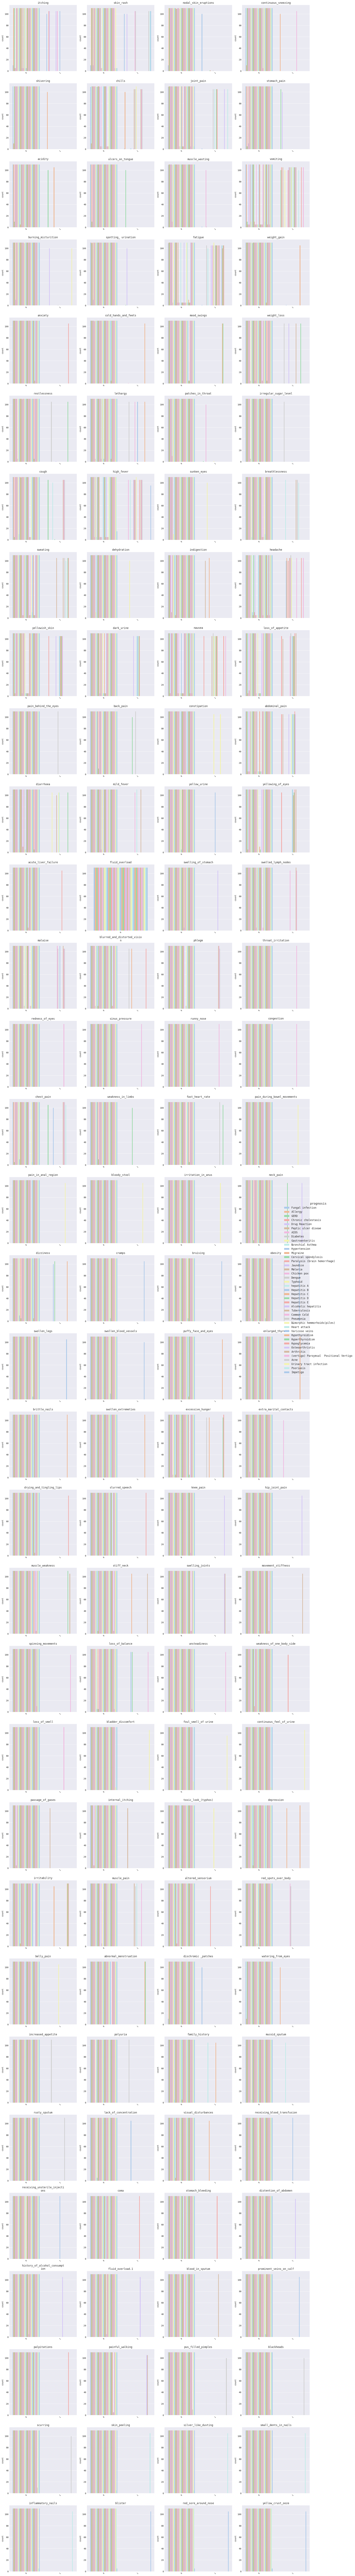

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import math

target_col = 'prognosis'
categorical_cols = train.drop(columns=[target_col]).columns.tolist()
order = train[target_col].unique().tolist()

# Tính toán số hàng và số cột (mỗi hàng 4 biểu đồ)
num_cols = len(categorical_cols)
plots_per_row = 4
num_rows = math.ceil(num_cols / plots_per_row)

# Tạo figure và axes
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Vẽ từng biểu đồ
for i, column in enumerate(categorical_cols):
    sns.countplot(x=column, data=train, ax=axes[i], hue=target_col, palette='pastel', hue_order=order)
    wrapped_title = '\n'.join(textwrap.wrap(column, width=27))
    axes[i].set_title(wrapped_title, fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=9)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_xlabel('')
    axes[i].get_legend().remove()

# Ẩn các trục thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Thêm legend chung bên phải
legend_ax = fig.add_axes([1.01, 0.1, 0.02, 0.8], frameon=False)
handles, labels = axes[0].get_legend_handles_labels()
legend_ax.legend(handles, labels, title=target_col,
                 loc='center', frameon=False, fontsize=12, title_fontsize=14)
legend_ax.axis('off')

plt.tight_layout()
plt.show()


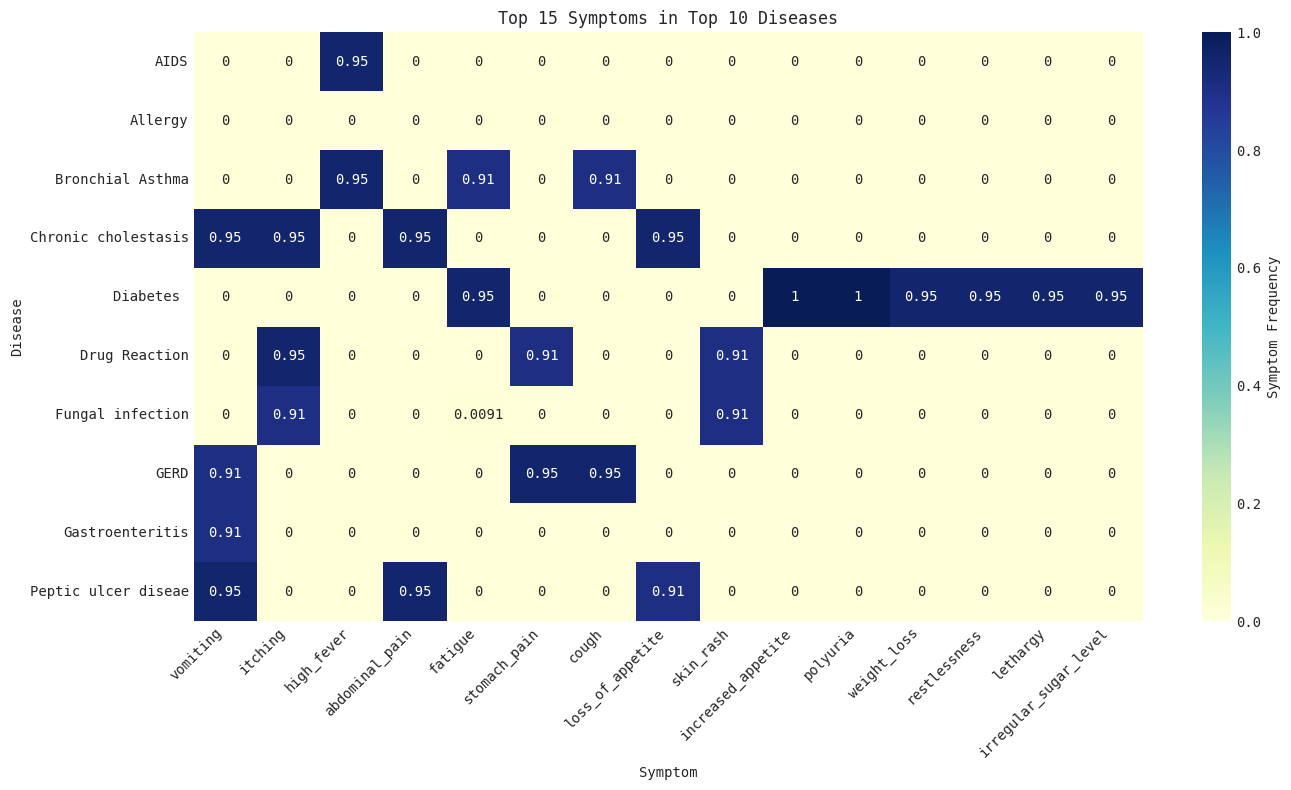

In [206]:
# Top 10 bệnh phổ biến nhất
top_diseases = train['prognosis'].value_counts().nlargest(10).index
filtered = train[train['prognosis'].isin(top_diseases)]

# Top 15 triệu chứng có nhiều giá trị 1 nhất (bỏ cột 'prognosis')
top_symptoms = filtered.drop(columns='prognosis').sum().nlargest(15).index

# Tính trung bình triệu chứng theo bệnh
grouped = filtered.groupby('prognosis')[top_symptoms].mean()

# Vẽ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Symptom Frequency'})
plt.title("Top 15 Symptoms in Top 10 Diseases")
plt.xlabel("Symptom")
plt.ylabel("Disease")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

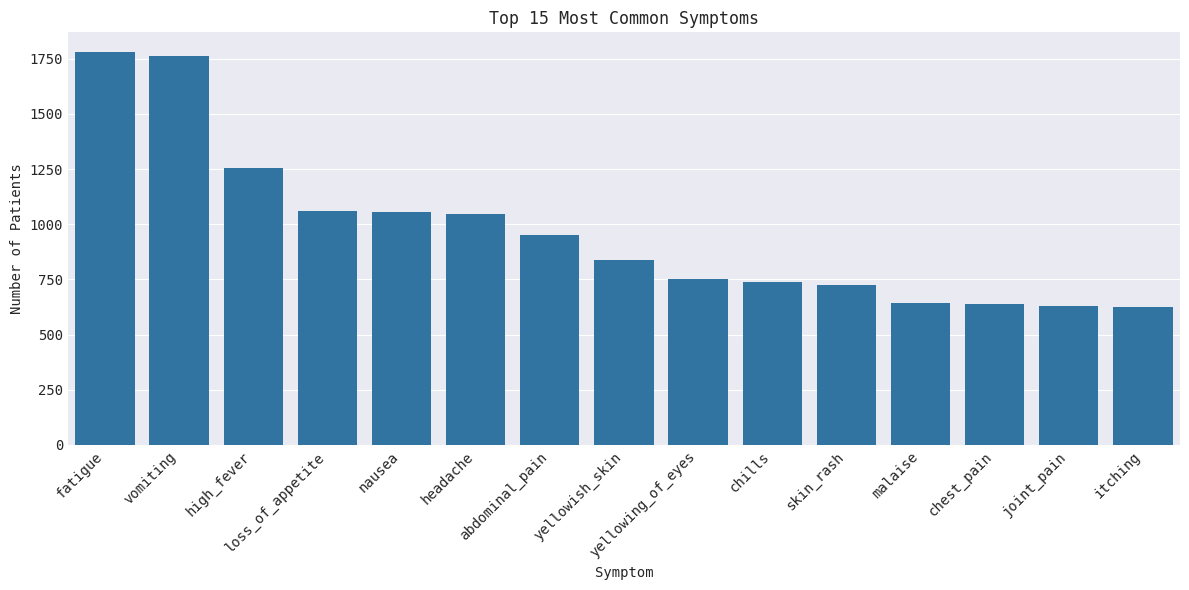

In [207]:
# Tổng số lần xuất hiện của mỗi triệu chứng
symptom_counts = train.drop(columns='prognosis').sum().sort_values(ascending=False)

# Vẽ 15 triệu chứng phổ biến nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.head(15).index, y=symptom_counts.head(15).values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Most Common Symptoms")
plt.ylabel("Number of Patients")
plt.xlabel("Symptom")
plt.tight_layout()
plt.show()


DATA PREPROCESSING

In [208]:
X_train = train.drop(columns=['prognosis'])
y_train = train['prognosis']
X_test = test.drop(columns=['prognosis'])
y_test = test['prognosis']

In [209]:
print(train.shape)
print(X_test.shape)

(4510, 133)
(410, 132)


In [210]:
#Check the distribution of target classes in train and test set
print(train.value_counts() / train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  swelling_of_stomach  swelled_lymph_nodes  malaise  blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  sinus_pressure  runny_nose  congestion  chest_pain  weakness_in_limbs  fast_heart_rate  pain_during_bowel_movements  pain_in_anal_region  bloody_stool  irritation_in_anus  neck_pain  dizziness  cramps  bruising  obesity  sw

In [211]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [212]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib, os

# Lấy danh sách các cột danh mục (có thể dùng luôn X_train.columns nếu tất cả là categorical)
categorical_features = X_train.columns.tolist()

# Tạo OneHotEncoder cho các cột danh mục
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Dùng ColumnTransformer để áp dụng encoder lên toàn bộ cột
col_trans = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)
col_trans.set_output(transform='pandas')

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['itching', 'skin_rash',
                                  'nodal_skin_eruptions', 'continuous_sneezing',
                                  'shivering', 'chills', 'joint_pain',
                                  'stomach_pain', 'acidity', 'ulcers_on_tongue',
                                  'muscle_wasting', 'vomiting',
                                  'burning_micturition', 'spotting_ urination',
                                  'fatigue', 'weight_gain', 'anxiety',
                                  'cold_hands_and_feets', 'mood_swings',
                                  'weight_loss', 'restlessness', 'lethargy',
                                  'patches_in_throat', 'irregular_sugar_level',
                                  'cough', 'high_fever', 'sunken_eyes',
                                  'breathlessness', 'sweating', 'dehydration', ...])])

In [213]:
# Fit + transform dữ liệu train
X_train_encoded = col_trans.fit_transform(X_train)

# Transform dữ liệu test
X_test_encoded = col_trans.transform(X_test)

# Tạo thư mục nếu chưa có & lưu transformer
os.makedirs('checkpoint', exist_ok=True)
joblib.dump(col_trans, 'checkpoint/preprocessing.joblib')

['checkpoint/preprocessing.joblib']

In [214]:
X_train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4505        0          0                     0                    0   
4506        0          1                     0                    0   
4507        0          0                     0                    0   
4508        0          1                     0                    0   
4509        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       1           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4505          0       0           0             0        0                 0   
4506          0       0           0             0        0                 0   
4507          0       0           0             0        0                 0   
4508          0       0           1             0        0                 0   
4509          0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0     ...                   0           0         0             0   
1     ...                   0           0         0             0   
2     ...                   0           0         0             0   
3     ...                   0           0         0             0   
4     ...                   0           0         0             0   
...   ...                 ...         ...       ...           ...   
4505  ...                   0           0         0             0   
4506  ...                   1           1         1             0   
4507  ...                   0           0         0             0   
4508  ...                   0           0         0             1   
4509  ...                   0           0         0             0   

      silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                       0                     0                   0        0   
1                       0                     0                   0        0   
2                       0                     0                   0        0   
3                       0                     0                   0        0   
4                       0                     0                   0        0   
...                   ...                   ...                 ...      ...   
4505                    0                     0                   0        0   
4506                    0                     0                   0        0   
4507                    0                     0                   0        0   
4508                    1                     1                   1        0   
4509                    0                     0                   0        1   

      red_sore_around_nose  yellow_crust_ooze  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  
...                    ...                ...  
4505                     0                  0  
4506              

In [215]:
import numpy as np

print("Mean:\n", np.mean(X_train, axis=0))
print("\n")
print("Std:\n", np.std(X_train, axis=0))


Mean:
 itching                 0.138581
skin_rash               0.160754
nodal_skin_eruptions    0.022838
continuous_sneezing     0.045676
shivering               0.022173
                          ...   
small_dents_in_nails    0.023282
inflammatory_nails      0.023282
blister                 0.023282
red_sore_around_nose    0.023282
yellow_crust_ooze       0.023282
Length: 132, dtype: float64


Std:
 itching                 0.345509
skin_rash               0.367304
nodal_skin_eruptions    0.149387
continuous_sneezing     0.208782
shivering               0.147246
                          ...   
small_dents_in_nails    0.150796
inflammatory_nails      0.150796
blister                 0.150796
red_sore_around_nose    0.150796
yellow_crust_ooze       0.150796
Length: 132, dtype: float64


EXPERIMENT

In [216]:
df_results = pd.DataFrame()

In [217]:
#function to tune hyperparameters
def hyper_search(model, model_name, param_grid, X_train, y_train, cv=5, n_iter=20, scoring='accuracy', random_state=RANDOM_STATE):
    global df_results
    # Hyperparameter tuning
    rs = RandomizedSearchCV(model, param_grid, n_iter=n_iter, n_jobs=-1, cv=StratifiedKFold(n_splits=cv), scoring=scoring, return_train_score=True, random_state=random_state)
    rs.fit(X_train, y_train)
    best_model = rs.best_estimator_
    
    #add the report about best hyperparameter of the model to dataframe
    result = pd.DataFrame(rs.cv_results_)
    result.sort_values('rank_test_score', inplace=True)
    result = result[['params', 'mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score']]
    display(result)
    best_hyper = result.loc[result['params']==rs.best_params_]
    best_hyper['model_name'] = model_name
    df_results = pd.concat([df_results, best_hyper], ignore_index=True)
    
    #save the model
    filename = os.path.join('checkpoint/', f'{model_name}.joblib')
    joblib.dump(best_model,filename)
    
#     #save report results
#     df_results.to_csv('report_result.csv')
    
    return best_model

KNN

In [218]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Giả sử X_train_encoded, X_test_encoded là dữ liệu đã được tiền xử lý, 
# và y_train, y_test là các nhãn văn bản ban đầu

# Chuyển nhãn đầu ra (y_train và y_test) thành số bằng cách sử dụng mapping
y_train_encoded = [mapping[disease] for disease in y_train]
y_test_encoded = [mapping[disease] for disease in y_test]

In [219]:
param_grid = [{
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2],
}]
knn = hyper_search(
    model=KNeighborsClassifier(),
    model_name='KNN',
    param_grid=param_grid,
    X_train=X_train_encoded,
    y_train=y_train_encoded,
    cv=5,
    n_iter=20,
    scoring='accuracy',
    random_state=RANDOM_STATE
)

params  mean_fit_time  mean_score_time  \
0   {'p': 1, 'n_neighbors': 3}       0.026204         1.206607   
1   {'p': 2, 'n_neighbors': 3}       0.027449         0.355052   
2   {'p': 1, 'n_neighbors': 5}       0.018668         1.062817   
3   {'p': 2, 'n_neighbors': 5}       0.021329         0.155919   
4   {'p': 1, 'n_neighbors': 7}       0.020763         0.863820   
5   {'p': 2, 'n_neighbors': 7}       0.020054         0.154062   
6   {'p': 1, 'n_neighbors': 9}       0.015216         0.887738   
7   {'p': 2, 'n_neighbors': 9}       0.016024         0.157061   
8  {'p': 1, 'n_neighbors': 11}       0.019182         0.884795   
9  {'p': 2, 'n_neighbors': 11}       0.018885         0.143451   

   mean_test_score  mean_train_score  
0              1.0               1.0  
1              1.0               1.0  
2              1.0               1.0  
3              1.0               1.0  
4              1.0               1.0  
5              1.0               1.0  
6              1.0               1.0  
7              1.0               1.0  
8              1.0               1.0  
9              1.0               1.0

Logistic Regression

In [220]:
param_grid = [{
    'C': [0.1, 1, 10, 100, 1000],  # Các giá trị của C để điều chỉnh mức độ phạt
    'penalty': ['l2'],              # Regularization L2
    'solver': ['liblinear', 'saga'], # Các thuật toán tối ưu hóa
    'max_iter': [10000]             # Đảm bảo số vòng lặp đủ lớn để mô hình hội tụ
},
{
    'penalty': [None],              # Không sử dụng regularization
}]
logreg = hyper_search(LogisticRegression(max_iter=10000, random_state=RANDOM_STATE), 'logistic_regression', param_grid, X_train_encoded, y_train_encoded)

params  mean_fit_time  \
0   {'solver': 'liblinear', 'penalty': 'l2', 'max_...       4.476906   
1   {'solver': 'saga', 'penalty': 'l2', 'max_iter'...       7.669869   
2   {'solver': 'liblinear', 'penalty': 'l2', 'max_...       4.110495   
3   {'solver': 'saga', 'penalty': 'l2', 'max_iter'...      32.711914   
4   {'solver': 'liblinear', 'penalty': 'l2', 'max_...       3.728273   
5   {'solver': 'saga', 'penalty': 'l2', 'max_iter'...     117.012401   
6   {'solver': 'liblinear', 'penalty': 'l2', 'max_...       2.989235   
7   {'solver': 'saga', 'penalty': 'l2', 'max_iter'...     158.609806   
8   {'solver': 'liblinear', 'penalty': 'l2', 'max_...       3.571934   
9   {'solver': 'saga', 'penalty': 'l2', 'max_iter'...     169.610869   
10                                  {'penalty': None}       0.268482   

    mean_score_time  mean_test_score  mean_train_score  
0          0.008279              1.0               1.0  
1          0.006048              1.0               1.0  
2          0.007720              1.0               1.0  
3          0.004989              1.0               1.0  
4          0.006747              1.0               1.0  
5          0.005278              1.0               1.0  
6          0.003720              1.0               1.0  
7          0.003957              1.0               1.0  
8          0.007094              1.0               1.0  
9          0.002174              1.0               1.0  
10         0.004098              1.0               1.0

Decision Tree

In [221]:
param_grid = [{
        'max_depth': [5, 10, 15, 20],
        'min_samples_leaf': [5, 10, 20, 30, 50],
        'criterion': ['gini', 'entropy']
    }]
decision_tree = hyper_search(DecisionTreeClassifier(random_state=RANDOM_STATE), 'decision_tree', param_grid, X_train_encoded, y_train_encoded)

params  mean_fit_time  \
10  {'min_samples_leaf': 5, 'max_depth': 10, 'crit...       0.072427   
13  {'min_samples_leaf': 10, 'max_depth': 15, 'cri...       0.064129   
3   {'min_samples_leaf': 10, 'max_depth': 10, 'cri...       0.067807   
14  {'min_samples_leaf': 50, 'max_depth': 15, 'cri...       0.070448   
8   {'min_samples_leaf': 50, 'max_depth': 20, 'cri...       0.064925   
19  {'min_samples_leaf': 30, 'max_depth': 15, 'cri...       0.062758   
6   {'min_samples_leaf': 20, 'max_depth': 20, 'cri...       0.069500   
7   {'min_samples_leaf': 20, 'max_depth': 10, 'cri...       0.069334   
17  {'min_samples_leaf': 50, 'max_depth': 5, 'crit...       0.058766   
2   {'min_samples_leaf': 5, 'max_depth': 20, 'crit...       0.115435   
1   {'min_samples_leaf': 10, 'max_depth': 20, 'cri...       0.104712   
0   {'min_samples_leaf': 50, 'max_depth': 20, 'cri...       0.114214   
16  {'min_samples_leaf': 20, 'max_depth': 20, 'cri...       0.114783   
12  {'min_samples_leaf': 30, 'max_depth': 15, 'cri...       0.103823   
5   {'min_samples_leaf': 20, 'max_depth': 15, 'cri...       0.100520   
11  {'min_samples_leaf': 50, 'max_depth': 10, 'cri...       0.082869   
9   {'min_samples_leaf': 10, 'max_depth': 10, 'cri...       0.084443   
15  {'min_samples_leaf': 30, 'max_depth': 10, 'cri...       0.087227   
4   {'min_samples_leaf': 50, 'max_depth': 5, 'crit...       0.062158   
18  {'min_samples_leaf': 5, 'max_depth': 5, 'crite...       0.057299   

    mean_score_time  mean_test_score  mean_train_score  
10         0.005729         0.923947          0.947783  
13         0.005935         0.913747          0.936585  
3          0.001206         0.908204          0.924945  
14         0.005293         0.906874          0.912084  
8          0.004512         0.906874          0.912084  
19         0.005530         0.906652          0.913803  
6          0.005817         0.906430          0.918514  
7          0.003210         0.906208          0.914690  
17         0.004440         0.688248          0.691020  
2          0.005363         0.565410          0.569789  
1          0.006729         0.565410          0.569789  
0          0.007319         0.565410          0.569789  
16         0.004507         0.565410          0.569789  
12         0.006585         0.441242          0.443958  
5          0.005945         0.441242          0.443958  
11         0.004938         0.292683          0.292683  
9          0.006213         0.292683          0.292683  
15         0.004922         0.292683          0.292683  
4          0.004169         0.146341          0.146341  
18         0.005313         0.146341          0.146341

Random Forest

In [222]:
param_grid = [{
        'n_estimators': [100, 300, 500, 1000, 2000],
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [10, 20, 30],
        'criterion': ['gini', 'entropy']
    }]
random_forest = hyper_search(RandomForestClassifier(random_state=RANDOM_STATE), 'random_forest', param_grid, X_train_encoded, y_train_encoded)

params  mean_fit_time  \
0   {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.818540   
1   {'n_estimators': 500, 'min_samples_leaf': 20, ...       4.004569   
6   {'n_estimators': 2000, 'min_samples_leaf': 20,...      18.403092   
5   {'n_estimators': 300, 'min_samples_leaf': 30, ...       2.588413   
15  {'n_estimators': 2000, 'min_samples_leaf': 10,...      12.281727   
11  {'n_estimators': 100, 'min_samples_leaf': 20, ...       0.939108   
10  {'n_estimators': 300, 'min_samples_leaf': 20, ...       1.883061   
9   {'n_estimators': 2000, 'min_samples_leaf': 30,...      18.626575   
17  {'n_estimators': 1000, 'min_samples_leaf': 30,...       8.621573   
19  {'n_estimators': 500, 'min_samples_leaf': 10, ...       2.925297   
16  {'n_estimators': 1000, 'min_samples_leaf': 10,...       8.760350   
13  {'n_estimators': 300, 'min_samples_leaf': 30, ...       2.376634   
14  {'n_estimators': 500, 'min_samples_leaf': 30, ...       3.694341   
12  {'n_estimators': 300, 'min_samples_leaf': 30, ...       1.696929   
3   {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.724747   
7   {'n_estimators': 100, 'min_samples_leaf': 20, ...       0.701586   
18  {'n_estimators': 2000, 'min_samples_leaf': 10,...      10.262004   
2   {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.653139   
8   {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.556589   
4   {'n_estimators': 100, 'min_samples_leaf': 10, ...       0.583908   

    mean_score_time  mean_test_score  mean_train_score  
0          0.024444         1.000000          1.000000  
1          0.114926         1.000000          1.000000  
6          0.523625         1.000000          1.000000  
5          0.091483         1.000000          1.000000  
15         0.250339         1.000000          1.000000  
11         0.025468         1.000000          1.000000  
10         0.053786         1.000000          0.999889  
9          0.685031         1.000000          1.000000  
17         0.156113         1.000000          1.000000  
19         0.077598         1.000000          1.000000  
16         0.175604         1.000000          1.000000  
13         0.064491         0.999778          0.999778  
14         0.064306         0.999778          0.999778  
12         0.046128         0.999778          0.998947  
3          0.019575         0.999778          0.999889  
7          0.020883         0.999778          1.000000  
18         0.193885         0.999335          0.999335  
2          0.020554         0.999113          0.998559  
8          0.025401         0.998448          0.998171  
4          0.014612         0.998448          0.999279

In [223]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0]
}
xg_boost = hyper_search(
    model=XGBClassifier(
        random_state=RANDOM_STATE,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),
    model_name='xg_boost',
    param_grid=param_grid,
    X_train=X_train_encoded,
    y_train=y_train_encoded,
    cv=5,
    n_iter=30,  # bạn có thể tăng lên nếu muốn tìm kỹ hơn
    scoring='accuracy',
    random_state=RANDOM_STATE
)

params  mean_fit_time  \
1   {'subsample': 0.8, 'n_estimators': 300, 'max_d...      39.600751   
3   {'subsample': 1.0, 'n_estimators': 300, 'max_d...      25.518308   
5   {'subsample': 1.0, 'n_estimators': 100, 'max_d...       9.337675   
4   {'subsample': 0.8, 'n_estimators': 200, 'max_d...      21.565393   
6   {'subsample': 0.8, 'n_estimators': 100, 'max_d...      10.407358   
7   {'subsample': 1.0, 'n_estimators': 200, 'max_d...      16.080860   
9   {'subsample': 1.0, 'n_estimators': 300, 'max_d...      27.091541   
8   {'subsample': 1.0, 'n_estimators': 300, 'max_d...      23.812403   
12  {'subsample': 0.8, 'n_estimators': 100, 'max_d...      10.099902   
13  {'subsample': 0.8, 'n_estimators': 200, 'max_d...      18.599694   
10  {'subsample': 1.0, 'n_estimators': 200, 'max_d...      17.116762   
11  {'subsample': 1.0, 'n_estimators': 100, 'max_d...       9.298357   
14  {'subsample': 0.8, 'n_estimators': 100, 'max_d...      10.509992   
15  {'subsample': 1.0, 'n_estimators': 200, 'max_d...      18.575637   
17  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      27.208219   
16  {'subsample': 0.8, 'n_estimators': 200, 'max_d...      20.109731   
24  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      27.735288   
25  {'subsample': 1.0, 'n_estimators': 100, 'max_d...       9.486726   
18  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      26.774182   
19  {'subsample': 0.8, 'n_estimators': 100, 'max_d...       9.748148   
20  {'subsample': 0.8, 'n_estimators': 100, 'max_d...      11.405251   
21  {'subsample': 0.8, 'n_estimators': 100, 'max_d...      10.153830   
22  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      30.382037   
23  {'subsample': 0.8, 'n_estimators': 200, 'max_d...      20.215361   
28  {'subsample': 1.0, 'n_estimators': 200, 'max_d...      18.364507   
29  {'subsample': 0.8, 'n_estimators': 200, 'max_d...      15.182922   
26  {'subsample': 1.0, 'n_estimators': 300, 'max_d...      23.262652   
27  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      25.479451   
2   {'subsample': 0.8, 'n_estimators': 300, 'max_d...      28.254642   
0   {'subsample': 1.0, 'n_estimators': 300, 'max_d...      22.429308   

    mean_score_time  mean_test_score  mean_train_score  
1          0.141205              1.0               1.0  
3          0.147518              1.0               1.0  
5          0.066373              1.0               1.0  
4          0.137054              1.0               1.0  
6          0.054979              1.0               1.0  
7          0.076657              1.0               1.0  
9          0.117583              1.0               1.0  
8          0.097101              1.0               1.0  
12         0.060823              1.0               1.0  
13         0.076253              1.0               1.0  
10         0.086838              1.0               1.0  
11         0.056122              1.0               1.0  
14         0.060115              1.0               1.0  
15         0.088023              1.0               1.0  
17         0.117068              1.0               1.0  
16         0.087319              1.0               1.0  
24         0.103190              1.0               1.0  
25         0.052468              1.0               1.0  
18         0.106522              1.0               1.0  
19         0.084833              1.0               1.0  
20         0.153176              1.0               1.0  
21         0.053051              1.0               1.0  
22         0.133672              1.0               1.0  
23         0.082406              1.0               1.0  
28         0.086897              1.0               1.0  
29         0.049319              1.0               1.0  
26         0.092801              1.0               1.0  
27         0.095865              1.0               1.0  
2          0.145287              NaN               NaN  
0          0.087863              NaN               NaN

Voting Classifier

In [224]:
clf1 = XGBClassifier(random_state=RANDOM_STATE, n_estimators=300, max_depth=10, use_label_encoder=False, eval_metric='mlogloss')
clf2 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=300, max_depth=20, min_samples_leaf=5)
clf3 = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='lbfgs', multi_class='auto')
clf4 = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=RANDOM_STATE)

votingClf = VotingClassifier(estimators=[
    ('xgb', clf1),
    ('rf', clf2),
    ('lr', clf3),
    ('svc', clf4)
], voting='soft')

votingClf_results = cross_validate(votingClf, X_train_encoded, y_train_encoded, cv=5, n_jobs=-1, return_train_score=True)

In [225]:
votingClf_results = {
    'params': 'XGBClassifier, RandomForestClassifier, LogisticRegression, SVC',
    'mean_fit_time': np.mean(votingClf_results['fit_time']),
    'mean_score_time': np.mean(votingClf_results['score_time']),
    'mean_test_score': np.mean(votingClf_results['test_score']),
    'mean_train_score': np.mean(votingClf_results['train_score']),
    'model_name': 'voting_classifier'
}

df_results = pd.concat([df_results, pd.DataFrame([votingClf_results])], ignore_index=True)

In [226]:
votingClf.fit(X_train_encoded, y_train_encoded)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_c...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='auto',
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [227]:
#save the model
filename = os.path.join('checkpoint/', 'votingClassifier.joblib')
joblib.dump(votingClf,filename)

['checkpoint/votingClassifier.joblib']

In [228]:
df_results

params  mean_fit_time  \
0                         {'p': 1, 'n_neighbors': 3}       0.026204   
1  {'solver': 'liblinear', 'penalty': 'l2', 'max_...       4.476906   
2  {'min_samples_leaf': 5, 'max_depth': 10, 'crit...       0.072427   
3  {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.818540   
4  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      39.600751   
5  XGBClassifier, RandomForestClassifier, Logisti...      16.955082   

   mean_score_time  mean_test_score  mean_train_score           model_name  
0         1.206607         1.000000          1.000000                  KNN  
1         0.008279         1.000000          1.000000  logistic_regression  
2         0.005729         0.923947          0.947783        decision_tree  
3         0.024444         1.000000          1.000000        random_forest  
4         0.141205         1.000000          1.000000             xg_boost  
5         0.248399         1.000000          1.000000    voting_classifier

In [229]:
df_results.to_csv('result_report.csv')

Feature Engineering

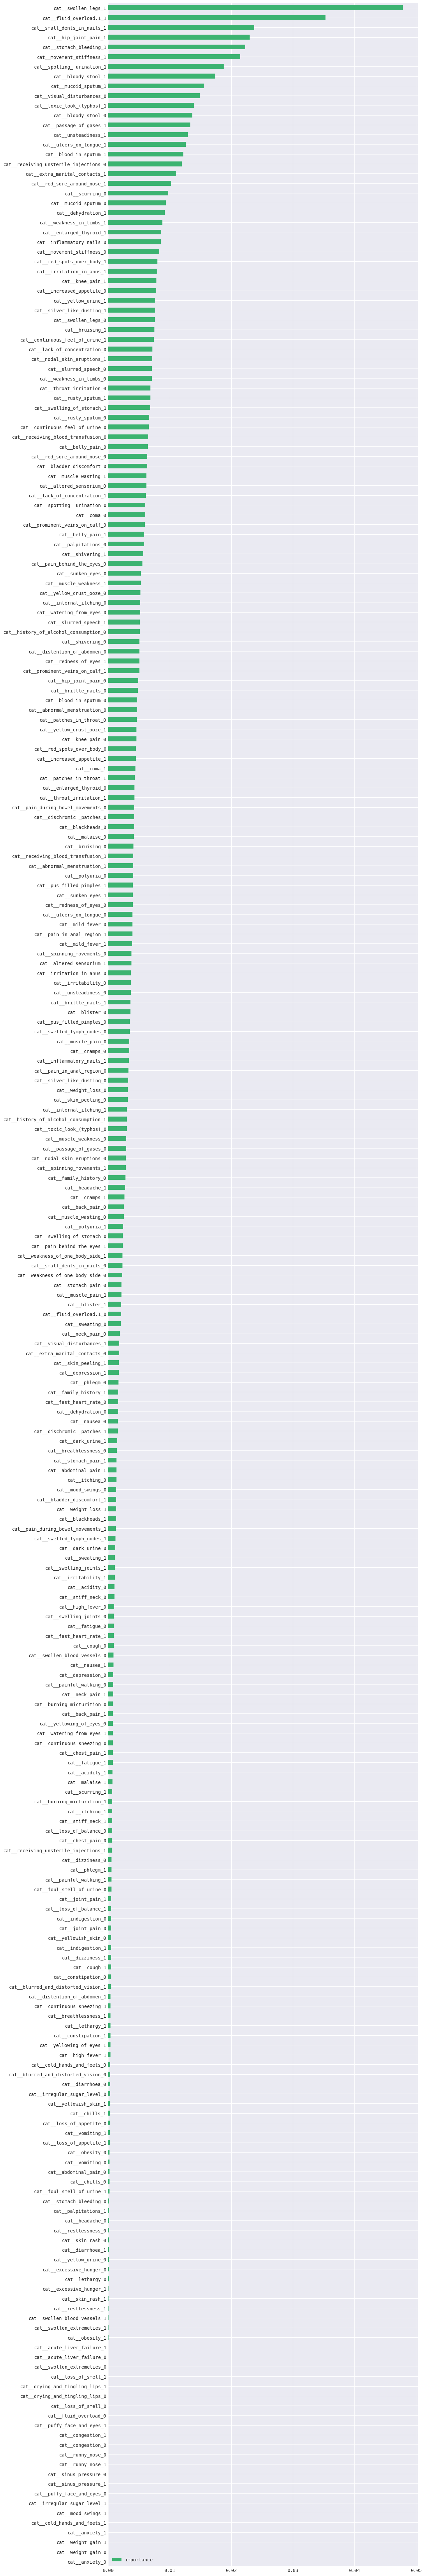

In [230]:
importance = xg_boost.feature_importances_
feature_importance = pd.DataFrame(data=importance, index=X_train_encoded.columns, columns=['importance']).sort_values(ascending=True, by='importance')
feature_importance.plot(kind='barh', figsize=(12, 100), color='#3cb371');

<Axes: >

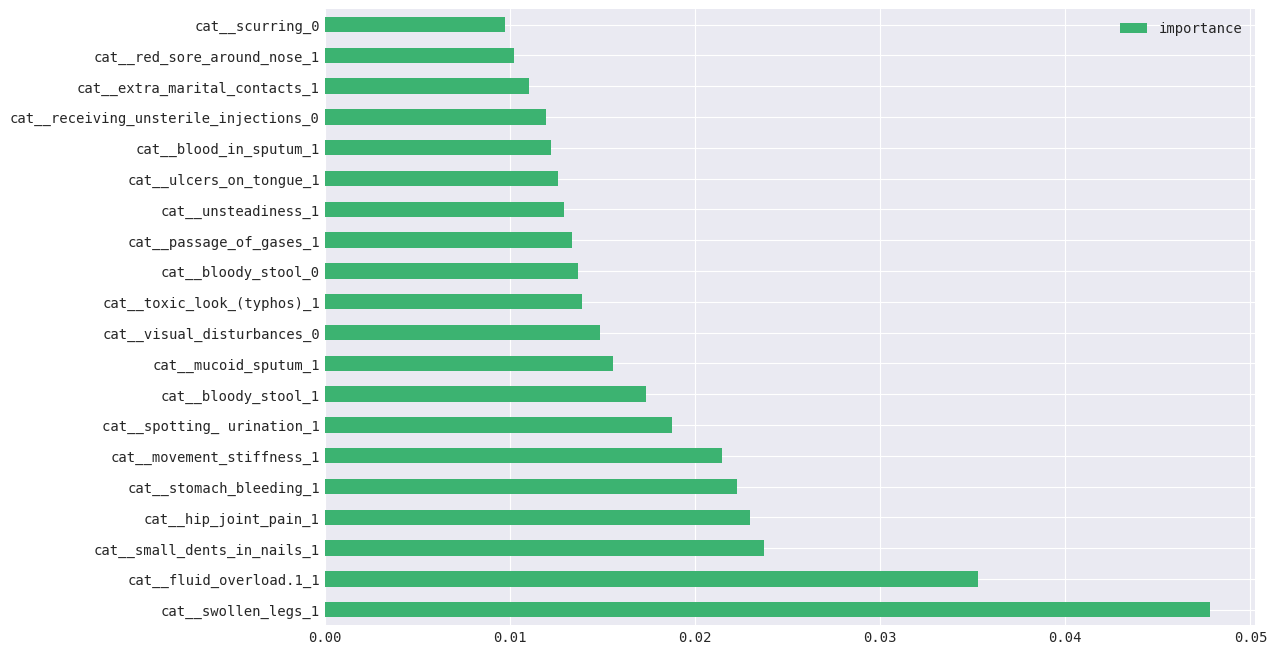

In [231]:
# Lấy 10 đặc trưng có độ quan trọng cao nhất
top_n = 20
feature_importance_top_n = feature_importance.nlargest(top_n, 'importance')

# Vẽ biểu đồ
feature_importance_top_n.plot(kind='barh', figsize=(12, 8), color='#3cb371')


Evaluation

In [232]:
y_pred = votingClf.predict(X_test_encoded)
model_name = 'Voting Classifier'
print(f'Accuracy of {model_name}', accuracy_score(y_test_encoded, y_pred))
print(f'F1_score of {model_name}', f1_score(y_test_encoded, y_pred, average='weighted'))
print(f'Precision_score of {model_name}', precision_score(y_test_encoded, y_pred, average='weighted'))
print(f'Recall_score of {model_name}', recall_score(y_test_encoded, y_pred, average='weighted'))

Accuracy of Voting Classifier 1.0
F1_score of Voting Classifier 1.0
Precision_score of Voting Classifier 1.0
Recall_score of Voting Classifier 1.0


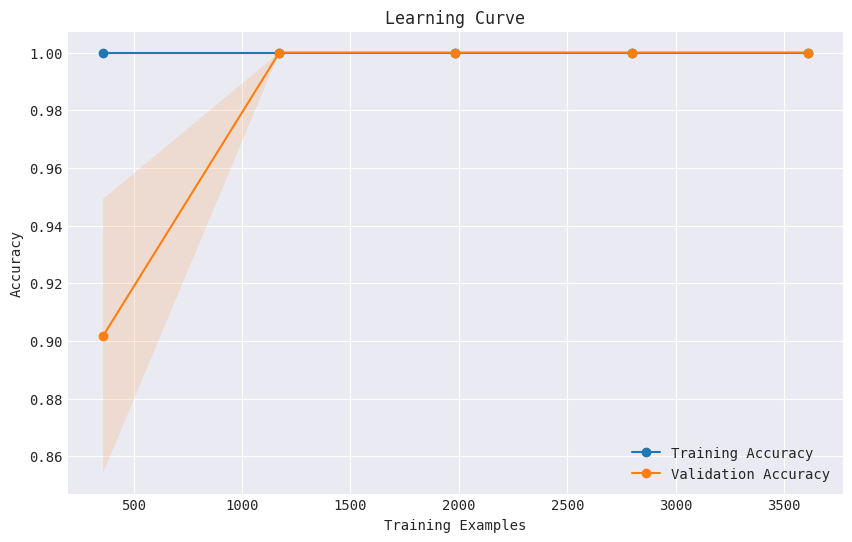

In [233]:
#Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(votingClf, X_train_encoded, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

plt.show()

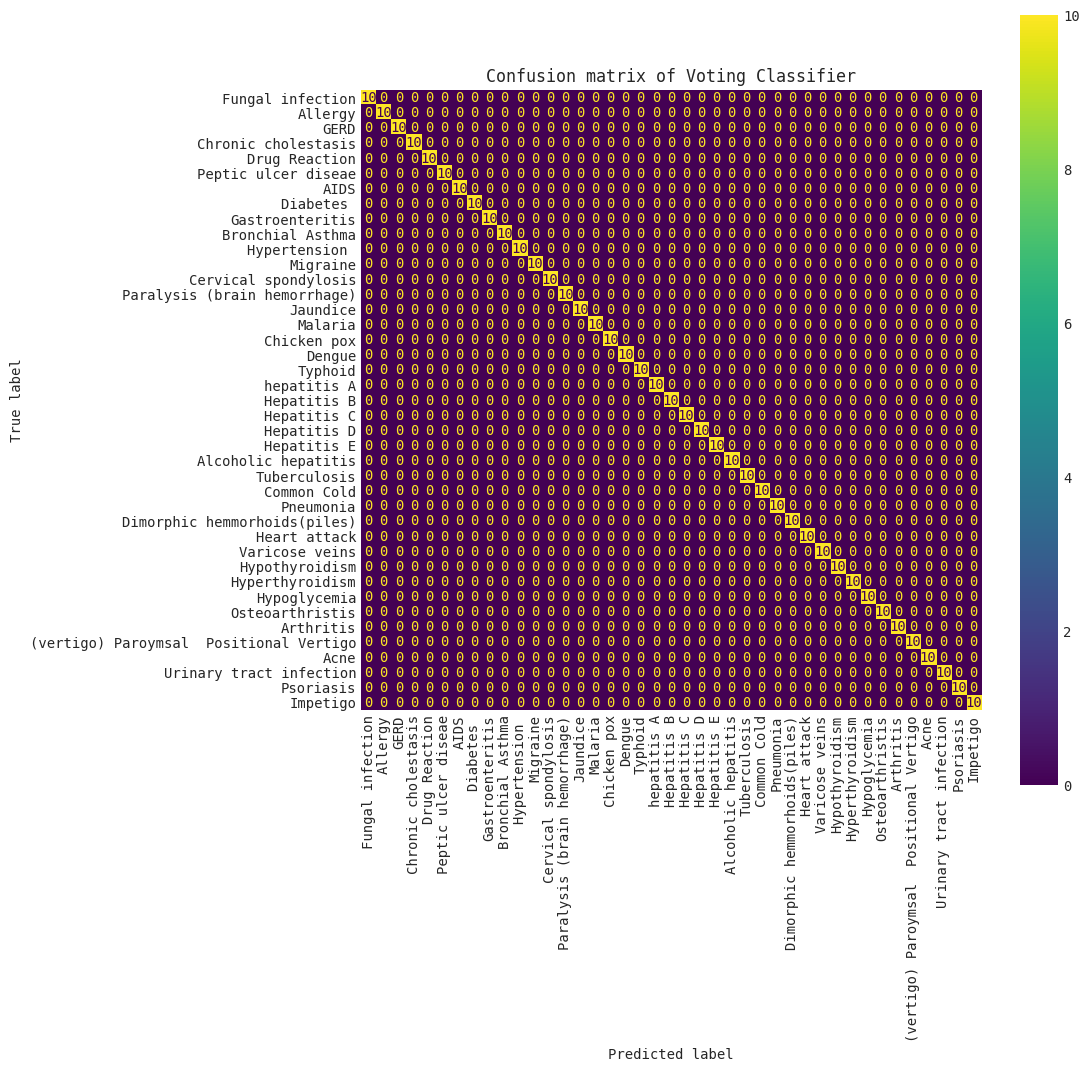

In [234]:
target_names = list(mapping.keys())
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names, rotation=90)  
ax.yaxis.set_ticklabels(target_names)
ax.grid(False)  
_ = ax.set_title("Confusion matrix of Voting Classifier")
plt.show()

In [235]:
print(classification_report(y_test_encoded, y_pred, target_names=target_names))

                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        10
                                Allergy       1.00      1.00      1.00        10
                                   GERD       1.00      1.00      1.00        10
                    Chronic cholestasis       1.00      1.00      1.00        10
                          Drug Reaction       1.00      1.00      1.00        10
                    Peptic ulcer diseae       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00        10
                              Diabetes        1.00      1.00      1.00        10
                        Gastroenteritis       1.00      1.00      1.00        10
                       Bronchial Asthma       1.00      1.00      1.00        10
                          Hypertension        1.00      1.00      1.00        10
                           

In [236]:
df_results

params  mean_fit_time  \
0                         {'p': 1, 'n_neighbors': 3}       0.026204   
1  {'solver': 'liblinear', 'penalty': 'l2', 'max_...       4.476906   
2  {'min_samples_leaf': 5, 'max_depth': 10, 'crit...       0.072427   
3  {'n_estimators': 100, 'min_samples_leaf': 30, ...       0.818540   
4  {'subsample': 0.8, 'n_estimators': 300, 'max_d...      39.600751   
5  XGBClassifier, RandomForestClassifier, Logisti...      16.955082   

   mean_score_time  mean_test_score  mean_train_score           model_name  
0         1.206607         1.000000          1.000000                  KNN  
1         0.008279         1.000000          1.000000  logistic_regression  
2         0.005729         0.923947          0.947783        decision_tree  
3         0.024444         1.000000          1.000000        random_forest  
4         0.141205         1.000000          1.000000             xg_boost  
5         0.248399         1.000000          1.000000    voting_classifier